## Sensitivity Analysis

Some experimentation with local and global sensitivity analysis based on the notebook provided by the course and some articles

#### References
- Broeke, G. ten, Voorn, G. van, Ligtenberg, A. (2016). Which Sensitivity Analysis Method Should I Use for My Agent-Based Model?



### OFAT
One-Factor-At-a-Time: Method of local sensitivity analysis, where one input parameter is varied and the others are kept fixed. According to ten Broeke (2016) a pre-test needs to be done to ensure a the model converges to a steady state behaviour. This might prove problematic for our model, since we examine early stage colonies, and in the results from the ODE model, the ant and fungus biomass are still increasing vastly. 

In [3]:
from leafcutter_ants_fungi_mutualism.model import LeafcutterAntsFungiMutualismModel, track_ants
from mesa.batchrunner import BatchRunner, BatchRunnerMP
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
"""
Pre-test to determine whether the model converges to a steady state behaviour
"""
model = LeafcutterAntsFungiMutualismModel(num_ants=50, num_plants=30, width=20, height=50,
                 pheromone_lifespan=30, num_plant_leaves=100,
                 leaf_regrowth_rate=1/2, ant_death_probability=0.01,
                 initial_fungus_energy=50, fungus_decay_rate=1/50)

repetitions = 100
time_steps = 100

output_variables = {"Ants_Biomass": track_ants,
                    "Fungus_Biomass": lambda m: m.fungi[0].biomass}

variable_parameters = {'num_ants': [20,50]}

batch = BatchRunner(LeafcutterAntsFungiMutualismModel,
                    max_steps = time_steps, 
                    variable_parameters = variable_parameters,
                    iterations = repetitions,
                    model_reporters = output_variables,
                    display_progress = True)

batch.run_all()

data = batch.get_model_vars_dataframe()

print(data)

200it [04:48,  1.44s/it]

     num_ants  Run  Ants_Biomass  Fungus_Biomass
0          20    0           471       90.295510
1          20    1           500       92.351506
2          20    2           612      101.773290
3          20    3           599      100.971564
4          20    4           615       94.166386
..        ...  ...           ...             ...
195        50  195           563      126.620138
196        50  196           799      126.646647
197        50  197           557      106.461081
198        50  198           454      109.119201
199        50  199           615      128.133387

[200 rows x 4 columns]


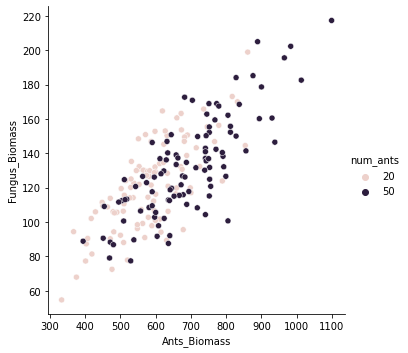

In [11]:
#data_collection = batch.get_collector_model()
sns.relplot(data=data, x='Ants_Biomass', y='Fungus_Biomass', hue='num_ants')